# Application prédiction de l'obésité

Dans cette application on vous propose de générer un modèle de prédiction de l'obésité à partir d'un ensemble de caractéristique et informations de la personne. Vous utiliserez une méthode de classification supervisée que vous appliquerez sur un ensemble de données réelles : "ObesityDataSet.csv"
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# II- Importation des données dans un frame pandas :
Compléter le code suivant afin d’importer les données du fichier pima.csv et afficher les caractéristiques correspondantes.
1- Importer la librairie pandas

2- lire le fichier ObesityDataSet.csv (copier le chemin complet à partir de votre drive)

3- Afficher les dimensions de la table avec la propriété shape

4-afficher les colonnes et leurs types

In [2]:
#importer  la librairie Pandas
import pandas as pd
#lecture du fichier "ObesityDataSet.txt" avec la fonction read_csv de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
data = pd.read_csv("ObesityDataSet.csv", sep=',')
#afficher les dimensions de la table des données (propriété shape)
print("Dimensions de la table des données:")
print(data.shape)
#afficher la liste des colonnes data.columns
print("Liste des colonnes:")
print(data.columns)
#afficher la liste des colonnes et leurs types (propriété dtypes)
print("Liste des colonnes et leurs types:")
print(data.dtypes)
#afficher les 10 premières lignes avec data.head(10)
print("Les 10 premières lignes:")
data.head(10)

Dimensions de la table des données:
(2111, 17)
Liste des colonnes:
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Liste des colonnes et leurs types:
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


#III- Préparation des données d'apprentissage

## 1- Vérification des données
1. Vérifier s'il y a des valeurs non renseignées (nulles)
`print(data.isnull().sum())`
2. Afficher la description des données avec la fonction describe: `data.describe()`



In [3]:
#compter les valeurs nulles
print("Valeurs nulles:")
print(data.isnull().sum())
#description des données
print("Description des données:")
data.describe()


Valeurs nulles:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Description des données:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## 2- Transformation des données

1. Transformer les données booléennes en utilisant `LabelBinarizer`

2. Transformer les données ordinales en utilisant `OrdinalEncoder`

3. ransformer les données texte en utlisant `LabelEncoder`


In [4]:
#transformation en matrice numpy seul reconnu par scikit learn
#data = pima.to_numpy()
from sklearn import preprocessing

Encoder1 = preprocessing.LabelEncoder()
Encoder2 = preprocessing.LabelBinarizer()

# Binarisation des champs booléen yes/no avec Encoder2
data["FAVC"] = Encoder2.fit_transform(data["FAVC"])
# Transformer les colonnes "SMOKE", "family_history_with_overweight" et "SCC"
data["SMOKE"] = Encoder2.fit_transform(data["SMOKE"])
data["family_history_with_overweight"] = Encoder2.fit_transform(data["family_history_with_overweight"])
data["SCC"] = Encoder2.fit_transform(data["SCC"])

# Labellisation des champ textes avec Encoder1
data["Gender"] = Encoder1.fit_transform(data["Gender"])
# Transformer les colonnes "CAEC","CALC", "MTRANS", "NObeyesdad"
data["CAEC"] = Encoder1.fit_transform(data["CAEC"])
data["CALC"] = Encoder1.fit_transform(data["CALC"])
data["MTRANS"] = Encoder1.fit_transform(data["MTRANS"])
data["NObeyesdad"] = Encoder1.fit_transform(data["NObeyesdad"])

# Afficher les 10 premières lignes
print("Les 10 premières lignes:")
data.head(10)


Les 10 premières lignes:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,1


In [5]:

# Afficher les 10 dernières lignes
print("Les 10 dernières lignes:")
data.tail(10)


Les 10 dernières lignes:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2101,0,25.722004,1.628470,107.218949,1,1,3.0,3.0,2,0,2.487070,0,0.067329,0.455823,2,3,4
2102,0,25.765628,1.627839,108.107360,1,1,3.0,3.0,2,0,2.320068,0,0.045246,0.413106,2,3,4
2103,0,21.016849,1.724268,133.033523,1,1,3.0,3.0,2,0,1.650612,0,1.537639,0.912457,2,3,4
2104,0,21.682367,1.732383,133.043941,1,1,3.0,3.0,2,0,1.610768,0,1.510398,0.931455,2,3,4
2105,0,21.285965,1.726920,131.335786,1,1,3.0,3.0,2,0,1.796267,0,1.728332,0.897924,2,3,4
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4
2110,0,23.664709,1.738836,133.472641,1,1,3.0,3.0,2,0,2.863513,0,1.026452,0.714137,2,3,4


In [6]:

# Afficher la liste des colonnes et leurs nouveaux types (propriété dtypes)
print("Liste des colonnes et leurs nouveaux types:")
print(data.dtypes)

Liste des colonnes et leurs nouveaux types:
Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object


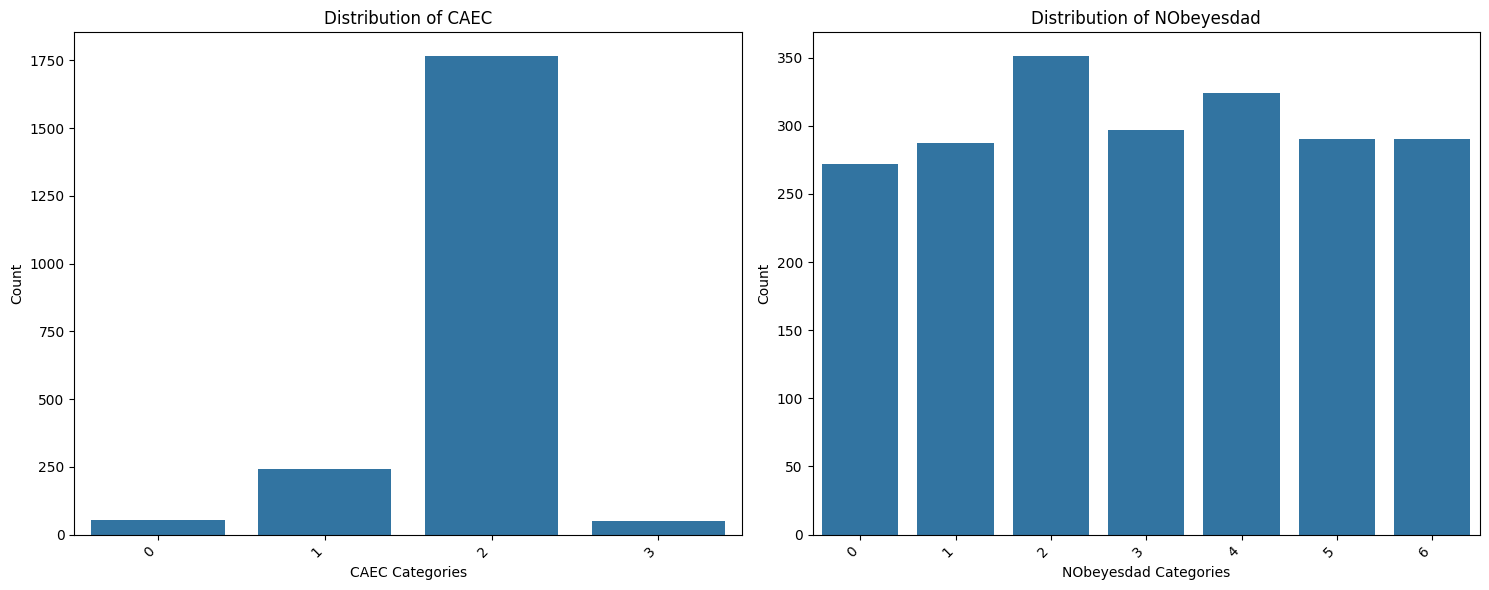

CAEC value counts:
CAEC
2    1765
1     242
0      53
3      51
Name: count, dtype: int64

NObeyesdad value counts:
NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot CAEC distribution
sns.countplot(x='CAEC', data=data, ax=ax1)
ax1.set_title('Distribution of CAEC')
ax1.set_xlabel('CAEC Categories')
ax1.set_ylabel('Count')

# Plot NObeyesdad distribution
sns.countplot(x='NObeyesdad', data=data, ax=ax2)
ax2.set_title('Distribution of NObeyesdad')
ax2.set_xlabel('NObeyesdad Categories')
ax2.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print value counts for both variables
print("CAEC value counts:")
print(data['CAEC'].value_counts())
print("\nNObeyesdad value counts:")
print(data['NObeyesdad'].value_counts())

## 3- Séparation des données input(X)/output(Y)

 Transformer le tableau pandas en matrice Numpy (avec la fonction to_numpy) et séparer ensuite les données explicatives X (16 premières variables) et de la cible Y (dernière variable). Utiliser le slicing.

In [8]:
#transformer d'abord data en numpy avec la méthode to_numpy
dataNp=data.to_numpy()
#séparation des données explicatives X et de la cible Y avec le slicing
X = dataNp[:, :16]
#y vecteur de la var. à prédire
Y = dataNp[:, 16]
#Y doit être de type Int
Y=Y.astype(int)
#vérifer les types la structure
print("Dimensions des données:")
print(X.shape, Y.shape)
print("Type des données:")
print(Y.dtype)
print(Y)

Dimensions des données:
(2111, 16) (2111,)
Type des données:
int64
[1 1 1 ... 4 4 4]


## 4- Scaling des données
**Faire cette question après avoir fait au moins un test de classfication sans "sclaling"**

Les variables dans l'échantillon data ont des échelles différentes. Pour optimiser la performance de certaines techniques de classification comme les SVMs, il est conseillé  soit de normaliser (StandardScaler) soit de mettre à l'échelle 0-1 (Min-Max) toutes les variables. Dans ce cas, on vous suggère de tester les deux cas comme suit:

1. Appliquer la méthode StandardScalar() comme suit:
```
x_normalized=preprocessing.StandardScaler().fit_transform(x)
```
2. Appliquer la méthode MinMaxdScalar() comme suit:
```
x_scaled=preprocessing.MinMaxScaler().fit_transform(x)
```

In [9]:
#importer le module preprocessing
from sklearn import preprocessing

#Normaliser les donnes
x_normalized=preprocessing.StandardScaler().fit_transform(X)
#Mettre à l'échelle les données
scaled_df = preprocessing.MinMaxScaler().fit_transform(X)



## 3- Découpage des données train/test

1. Découper  les données `x_nomalized` ou `x_scaled` en données train et test avec la fonction **train_test_split** du module **model_selection** de pandas. La taille de l’échantillon train est égale à 70% (paramètre test_size de la fonction `train_test_split`).
Effectuer ce découpage afin de créer (x_train, y_train) à partir de  `x_nomalized` ou `x_scaled`.

2. Afficher les structures des ensembles crées en utilisant la propriété  `shape` de chaque vecteur.

In [10]:
#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas
#importation du module model_selection de scikit learn
from sklearn.model_selection import train_test_split
#subdivision des données  éch.app = 70%
x1_train, x1_test, y1_train, y1_test = train_test_split(x_normalized, Y, test_size=0.3, random_state=42)

print("Structures des ensembles crées:")
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)
print("Les 10 premières lignes de x_train:")
pd.DataFrame(x1_train).head()




Structures des ensembles crées:
(1477, 16) (634, 16) (1477,) (634,)
Les 10 premières lignes de x_train:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.011914,0.263145,-0.791780,0.719595,0.472291,0.362349,1.088342,0.404153,0.300346,-0.1459,-0.860402,-0.218272,-1.072747,0.009242,-0.52116,0.503337
1,-1.011914,0.265964,-0.486235,0.967996,0.472291,0.362349,1.088342,0.404153,0.300346,-0.1459,1.249987,-0.218272,-1.188039,-0.853256,-0.52116,0.503337
2,0.988227,-0.994977,0.519063,-0.008169,0.472291,0.362349,0.914235,0.404153,0.300346,-0.1459,1.195866,-0.218272,0.246392,-1.018806,-0.52116,0.503337
3,-1.011914,-0.364507,-0.017981,-0.786178,0.472291,-2.759769,1.088342,0.404153,-3.969213,-0.1459,-0.013073,4.581439,1.163820,0.561997,-0.52116,0.503337
4,0.988227,-0.135710,-0.337151,-0.442470,0.472291,0.362349,-0.785019,0.404153,0.300346,-0.1459,-0.013073,-0.218272,-1.036152,2.177807,-0.52116,0.503337


In [11]:
print("Les 10 premières lignes de y_train:")
pd.DataFrame(y1_train).head()

Les 10 premières lignes de y_train:


,0
0,4
1,4
2,6
3,1
4,5


In [12]:
x2_train, x2_test, y2_train, y2_test = train_test_split(scaled_df, Y, test_size=0.3, random_state=42)
print("Structures des ensembles crées:")
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)
print("Les 10 premières lignes de x_train:")
pd.DataFrame(x2_train).head()


Structures des ensembles crées:
(1477, 16) (634, 16) (1477,) (634,)
Les 10 premières lignes de x_train:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.254939,0.335506,0.495736,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.240375,0.0,0.032681,0.331746,0.666667,0.75
1,0.0,0.255319,0.389283,0.544276,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.887007,0.0,0.000000,0.069209,0.666667,0.75
2,1.0,0.085106,0.566221,0.353523,1.0,1.0,0.953531,0.666667,0.666667,0.0,0.870424,0.0,0.406609,0.018817,0.666667,0.75
3,0.0,0.170213,0.471698,0.201493,1.0,0.0,1.000000,0.666667,0.000000,0.0,0.500000,1.0,0.666667,0.500000,0.666667,0.75
4,1.0,0.201098,0.415523,0.268657,1.0,1.0,0.500000,0.666667,0.666667,0.0,0.500000,0.0,0.043054,0.991839,0.666667,0.75


# IV - Classification avec le modèle de régression logistique
Comme première approche de classification, nous utiliserons la régression logistique.

1-A partir du module `linear_model` du package sklearn, importer la classe `LogisticRegression`.

2- Créer une instance de la classe `LogisticRegression`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre premier modèle prédictif que vous appellerez « lr_model ».  Pour ce faire, il faut exécuter la fonction fit de la classe LogisticRegression qui prend comme argument les ensembles les données explicatives `x_train` et les données cibles `y_train`. R

4- Appliquer les modèles générés sur les données tests `x_test` à travers la fonction `predict'.

5- Importer le module seaborn `import seaborn as sns`

6- Afficher la matrice de confusion.




Score du modèle de régression logistique:
0.8596214511041009
0.8585156568586819
0.8525358454927747
Matrice de confusion:
[[85  1  0  0  0  0  0]
 [20 56  0  0  0 12  5]
 [ 0  0 92  8  0  0  2]
 [ 0  0  2 86  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  8  0  0  0 64 16]
 [ 0  0  4  0  0 10 65]]


Text(0.5, 47.7222222222222, 'Prédiction')

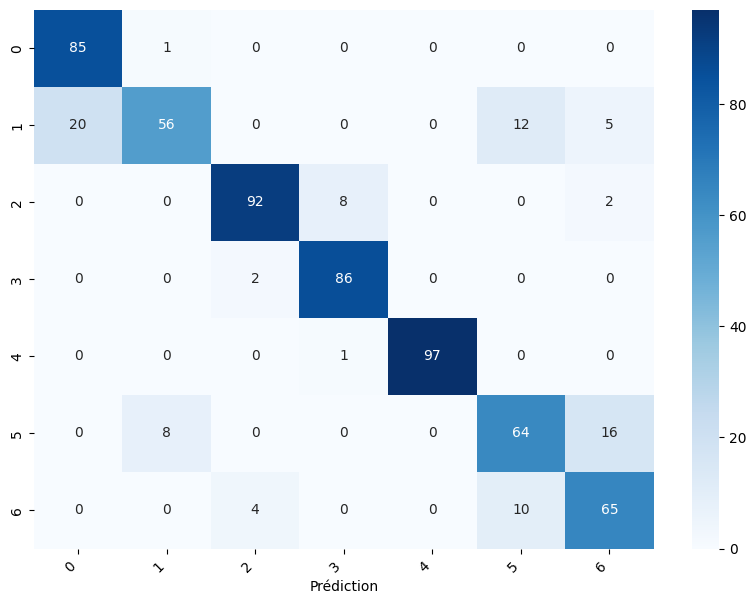

In [13]:
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression
#création d'une instance de la classe : lr_model
lr_model_1=LogisticRegression()

#exécution de l'instance sur les données d'apprentissage x1_train et x2_train
#c.à d . construction du modèle prédictif
lr_model_1.fit(x1_train, y1_train)
#application des modèles sur les données test
y_pred_1=lr_model_1.predict(x1_test)

#Importer le module metric
from sklearn import metrics
#Calculer les scores des modèles (accuracy, recall et f1_score )
lr_model_score_accuracy_1 = metrics.accuracy_score(y1_test, y_pred_1)
lr_model_score_recall_1 = metrics.recall_score(y1_test, y_pred_1, average='macro')
lr_model_score_f1_1 = metrics.f1_score(y1_test, y_pred_1, average='macro')


#Affichier les scores. Que remarquez vous?
print("Score du modèle de régression logistique:")
print(lr_model_score_accuracy_1)
print(lr_model_score_recall_1)
print(lr_model_score_f1_1)

#importer le module seaborn (pour la matrice de confusion)
import seaborn as sns
#création et affichage de la matrice de confusion
CM = metrics.confusion_matrix(y1_test, y_pred_1)
print("Matrice de confusion:")
print(CM)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 7))
# Create a heatmap with the correct number of labels
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', )

# Rotate x-axis labels for better readability if there are many classes
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prédiction')



Score du modèle de régression logistique:
0.7239747634069401
0.7202299785089806
0.7075524283458678
Matrice de confusion:
[[76  7  0  0  0  2  1]
 [27 38  2  0  0 11 15]
 [ 0  0 70 17  5  5  5]
 [ 0  0  2 86  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 4  9  7  0  0 53 15]
 [ 0  4 21  5  1  9 39]]


/Users/alexs/PycharmProjects/Applied_ML_II/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 47.7222222222222, 'Prédiction')

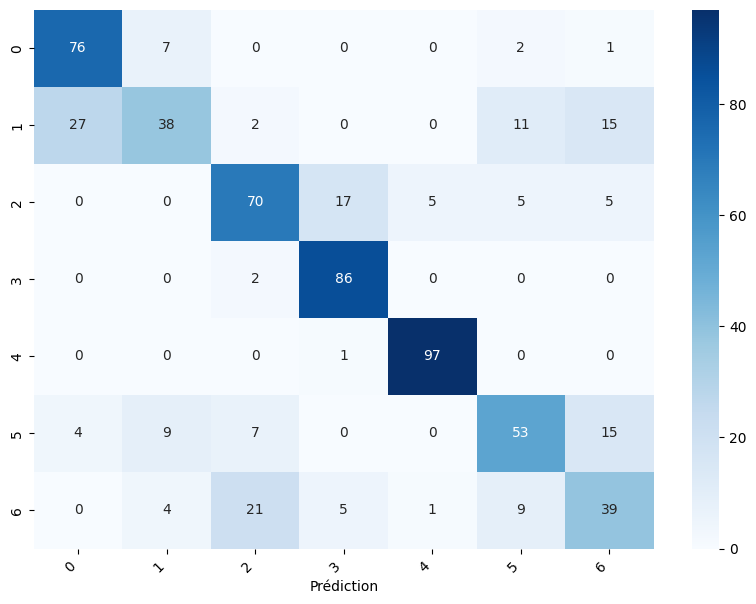

In [14]:
lr_model_2=LogisticRegression()
lr_model_2.fit(x2_train, y2_train)
y_pred_2=lr_model_2.predict(x2_test)
lr_model_score_accuracy_2 = metrics.accuracy_score(y2_test, y_pred_2)
lr_model_score_recall_2 = metrics.recall_score(y2_test, y_pred_2, average='macro')
lr_model_score_f1_2 = metrics.f1_score(y2_test, y_pred_2, average='macro')
print("Score du modèle de régression logistique:")
print(lr_model_score_accuracy_2)
print(lr_model_score_recall_2)
print(lr_model_score_f1_2)

CM = metrics.confusion_matrix(y2_test, y_pred_2)
print("Matrice de confusion:")
print(CM)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 7))
# Create a heatmap with the correct number of labels
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', )

# Rotate x-axis labels for better readability if there are many classes
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prédiction')




# VII- Classification par les SVM
Comme quatrième approche de classification, nous utiliserons les SVM.

1-A partir du module `svm` du package sklearn, importer la classe `SVC`.

2- Créer une instance de la classe `SVC` de `sklearn.svm`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre quatrième modèle prédictif que vous appellerez « svm_model ».  Pour ce faire, il faut exécuter la fonction fit de la classe SVC.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

LinearSVC()
Score du modèle de régression logistique:
0.7460567823343849
0.7440356505200539
0.7343272102733873
Matrice de confusion:
[[85  0  0  0  0  1  0]
 [14 41  8  0  0 13 17]
 [ 0  0 68 18  0  8  8]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0 10  8  0  0 53 17]
 [ 0  3 22  0  0 12 42]]


Text(0.5, 47.7222222222222, 'Prédiction')

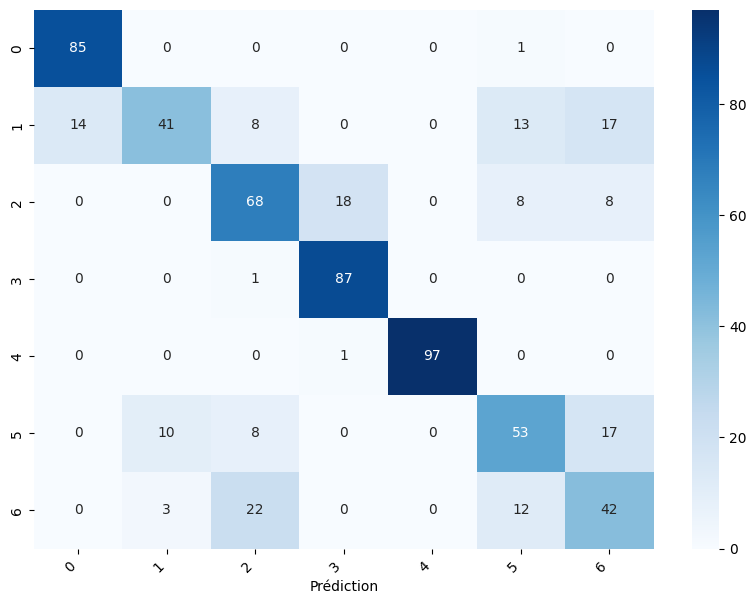

In [15]:
#importer la classe SVC
from sklearn.svm import LinearSVC
 #instanciation de l’objet svm_model
svm_model_1=LinearSVC()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf

print(svm_model_1)
#exécution de l'instance sur les données d'apprentissage
svm_model_1.fit(x1_train, y1_train)

#appliquer le modèle sur les données test
y_pred_1_svm=svm_model_1.predict(x1_test)
lr_model_score_accuracy_1 = metrics.accuracy_score(y1_test, y_pred_1_svm)
lr_model_score_recall_1 = metrics.recall_score(y1_test, y_pred_1_svm, average='macro')
lr_model_score_f1_1 = metrics.f1_score(y1_test, y_pred_1_svm, average='macro')
print("Score du modèle de régression logistique:")
print(lr_model_score_accuracy_1)
print(lr_model_score_recall_1)
print(lr_model_score_f1_1)

#création et affichage de la matrice de confusion
CM = metrics.confusion_matrix(y1_test, y_pred_1_svm)
print("Matrice de confusion:")
print(CM)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 7))
# Create a heatmap with the correct number of labels
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', )

# Rotate x-axis labels for better readability if there are many classes
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prédiction')



Score du modèle de régression logistique:
0.7255520504731862
0.7238855834005238
0.7094903542947151
Matrice de confusion:
[[81  2  0  0  0  2  1]
 [25 36  7  0  0  8 17]
 [ 0  0 65 23  3  6  5]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0 10  8  0  1 52 17]
 [ 0  2 22  2  0 11 42]]


Text(0.5, 47.7222222222222, 'Prédiction')

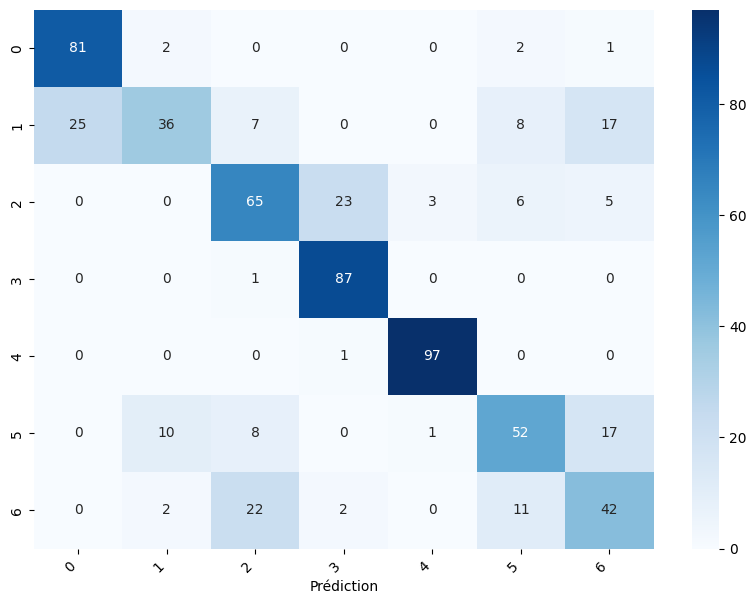

In [16]:
svm_model_2=LinearSVC()
svm_model_2.fit(x2_train, y2_train)
y_pred_2_svm=svm_model_2.predict(x2_test)

lr_model_score_accuracy_2 = metrics.accuracy_score(y2_test, y_pred_2_svm)
lr_model_score_recall_2 = metrics.recall_score(y2_test, y_pred_2_svm, average='macro')
lr_model_score_f1_2 = metrics.f1_score(y2_test, y_pred_2_svm, average='macro')
print("Score du modèle de régression logistique:")
print(lr_model_score_accuracy_2)
print(lr_model_score_recall_2)
print(lr_model_score_f1_2)
CM = metrics.confusion_matrix(y2_test, y_pred_2_svm)
print("Matrice de confusion:")
print(CM)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 7))
# Create a heatmap with the correct number of labels
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', )

# Rotate x-axis labels for better readability if there are many classes
plt.xticks(rotation=45, ha='right')
plt.xlabel('Prédiction')


# VIII- Validation des modèles

1. Calculer les scores TPR et FPR de chaque modèle généré et les ajouter dans des listes

2. Afficher chaque score avec une courbe ou histogramme

Comparer les résultats


Classification Report - LR Normalized
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        86
           1       0.86      0.60      0.71        93
           2       0.94      0.90      0.92       102
           3       0.91      0.98      0.94        88
           4       1.00      0.99      0.99        98
           5       0.74      0.73      0.74        88
           6       0.74      0.82      0.78        79

    accuracy                           0.86       634
   macro avg       0.86      0.86      0.85       634
weighted avg       0.86      0.86      0.86       634


Classification Report - LR Scaled
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        86
           1       0.66      0.41      0.50        93
           2       0.69      0.69      0.69       102
           3       0.79      0.98      0.87        88
           4       0.94      0.99      0.97        98
    

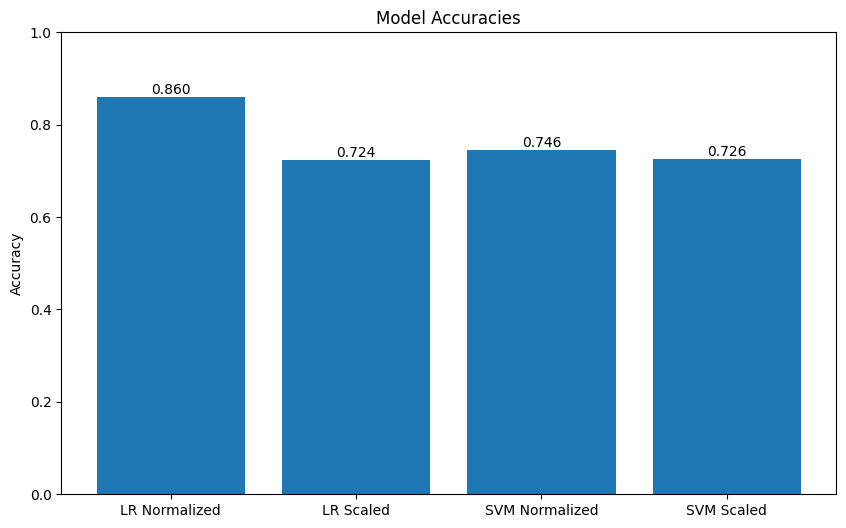

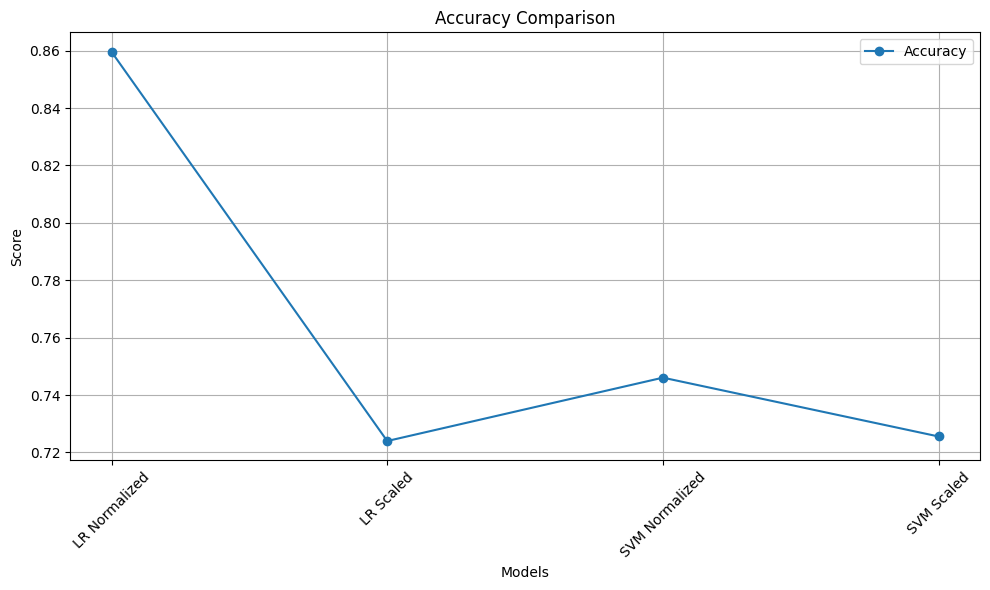

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):    
    # Classification Report
    report = classification_report(y_true, y_pred, output_dict=True)
    # Printing Classification Report
    print(f"\nClassification Report - {model_name}")
    print(classification_report(y_true, y_pred))
    
    return report

# Evaluate each model
lr_report_1 = evaluate_model(y1_test, y_pred_1, 'LR Normalized')
lr_report_2 = evaluate_model(y2_test, y_pred_2, 'LR Scaled')
svm_report_1 = evaluate_model(y1_test, y_pred_1_svm, 'SVM Normalized')
svm_report_2 = evaluate_model(y2_test, y_pred_2_svm, 'SVM Scaled')

# Comparing overall accuracy
models = ['LR Normalized', 'LR Scaled', 'SVM Normalized', 'SVM Scaled']
accuracies = [
    lr_report_1['accuracy'],
    lr_report_2['accuracy'],
    svm_report_1['accuracy'],
    svm_report_2['accuracy']
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
plt.show()

# Calculating F1 scores
f1_scores = [
    lr_report_1['weighted avg']['f1-score'],
    lr_report_2['weighted avg']['f1-score'],
    svm_report_1['weighted avg']['f1-score'],
    svm_report_2['weighted avg']['f1-score']
]

# Plotting accuracy and F1 scores
x = models
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(x, accuracies, marker='o', label='Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# IX - Optimisation de la performance
Compléter cette application en cherchant des solutions pour optimiser la performance de vos modèles. Vous pouvez aussi tester d'autres modèles de classification comme les fôrets d'arbres de décision.